<a href="https://colab.research.google.com/github/Kavs6/hello-world/blob/master/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

Insurance charges estimation based on sex,age ,bmi,no. of children,smoker and region.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
#Creating a dataframe from the data
df=pd.read_csv('/content/insurance_charges.csv')

In [113]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [115]:
df.info()
#no null values,so no need for filtering the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


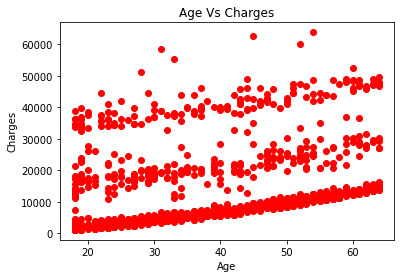

In [116]:
#Data Visualisation
plt.scatter(df['age'], df['charges'], color='red')
plt.title('Age Vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

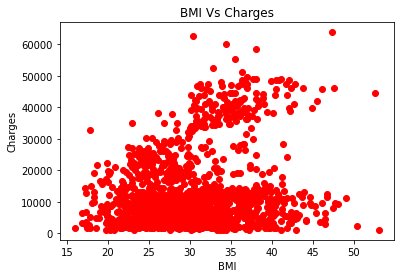

In [117]:
plt.scatter(df['bmi'], df['charges'], color='red')
plt.title('BMI Vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

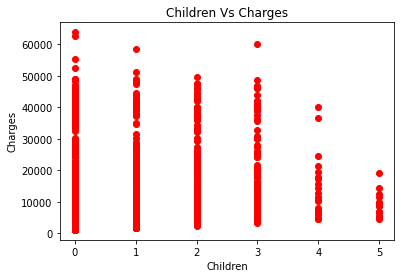

In [118]:
plt.scatter(df['children'], df['charges'], color='red')
plt.title('Children Vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

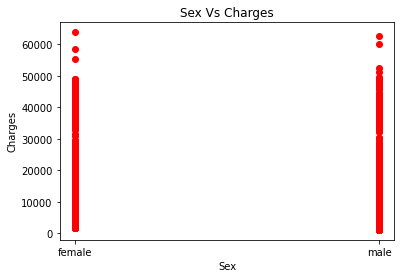

In [119]:
plt.scatter(df['sex'], df['charges'], color='red')
plt.title('Sex Vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

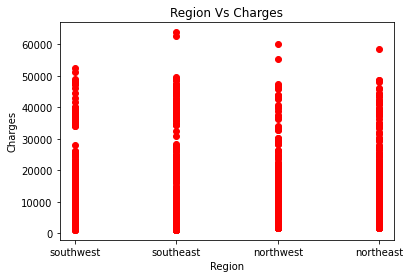

In [120]:
plt.scatter(df['region'], df['charges'], color='red')
plt.title('Region Vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

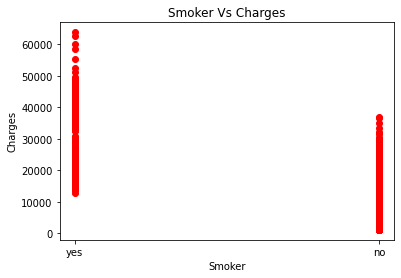

In [121]:
plt.scatter(df['smoker'], df['charges'], color='red')
plt.title('Smoker Vs Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

In [122]:
charges=df.charges
df.drop(['charges'],inplace=True,axis=1)
df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [123]:
sex_categ=pd.get_dummies(df.sex,prefix='sex')
sex_categ

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [124]:
smoker_categ=pd.get_dummies(df.smoker,prefix='smoker')
smoker_categ


,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [125]:
reg_categ=pd.get_dummies(df.region,prefix='region')
reg_categ

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [126]:
#Creating dummy values for string columns
df = pd.concat([df,pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df.drop(['sex'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['smoker'], prefix='smoker')],axis=1)
df.drop(['smoker'],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['region'], prefix='region')],axis=1)
df.drop(['region'],axis=1, inplace=True)
df['charges']=charges
df

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,1,0,1,0,0,0,0,1,2007.94500


In [127]:
#dividing data into inputs and outputs
x=df.iloc[:,0:11].values
y=df.iloc[:,11].values
#all columns are almost in the same range ,so no need to normalize the data

In [128]:
x

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [129]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [130]:
#splitting data using train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 338)


In [131]:
x_train.shape

(1070, 11)

In [132]:
x_test.shape

(268, 11)

In [133]:
#Running a regressor-here Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#Fitting the model
model.fit(x_train,y_train) 
#Predictig the output
y_pred = model.predict(x_test)
print(y_pred)

[ 9.76359095e+03  3.36899818e+03  7.63914842e+03  9.39826926e+03
  7.97707037e+03  3.34932184e+03  3.54008030e+04  1.50326181e+04
  8.93952985e+03  3.31865631e+04  7.65503699e+02  3.10203572e+03
  5.29671990e+03  6.03713049e+03  2.76201333e+04  3.95069556e+04
  3.09020076e+04  8.71514691e+03  3.64431362e+03  1.51473337e+04
  1.42648289e+04  8.76940822e+03  2.98600233e+04  3.31955624e+04
 -7.61287743e+00  3.14361863e+04  6.41376734e+02  1.13843071e+04
  7.53264267e+03  5.23750235e+03  5.77246461e+03  9.44717940e+03
  1.67193917e+04  4.54541453e+03  1.60547454e+04  5.71876445e+03
  8.72520316e+03  1.29102200e+04  3.34188247e+03  7.74719434e+03
  1.08548812e+03  8.05496886e+03  1.20143477e+04 -1.25411476e+03
  8.94414958e+03  1.04507244e+04  1.97158745e+03  7.25910463e+03
  1.70980271e+04  2.79946985e+04  8.89662449e+03  2.99855463e+04
  2.74879047e+04  5.83271130e+03  3.37459216e+04  2.86448718e+04
  1.18485426e+04  1.46517205e+04  5.30209674e+03  6.46300540e+03
  4.66786613e+03  1.41318

In [134]:
print(y_test)

[ 1163.4627   3353.284    7986.47525  5630.45785  7281.5056   2523.1695
 42124.5153  10450.552    7512.267   40932.4295   2913.569    1137.011
  3062.50825  4040.55825 33900.653   47928.03    19798.05455  6748.5912
 17626.23951  8569.8618  12269.68865  8534.6718  37484.4493  23568.272
  1964.78    35069.37452  1837.237    5662.225    6203.90175  6272.4772
  7133.9025  17929.30337 16069.08475  2134.9015  14590.63205  4454.40265
  8232.6388  14256.1928   1880.07     5375.038    1969.614    6067.12675
  8068.185    2585.269    8515.7587   9715.841    1842.519    9264.797
 11566.30055 18310.742    4518.82625 37465.34375 17496.306    4237.12655
 39047.285   34806.4677  11244.3769  10736.87075  4883.866    3943.5954
  1631.8212  12231.6136   6600.20595  6373.55735  1391.5287  10115.00885
  5584.3057  19594.80965 12982.8747   8671.19125  8627.5411   6389.37785
 11520.09985  8428.0693   8026.6666  10269.46    11840.77505  6082.405
 19673.33573  6600.361   16577.7795  22218.1149  34254.05335 38

In [135]:
from sklearn import metrics
# Mean Squared Error 
metrics.mean_squared_error(y_test,y_pred)

28771509.94505758

In [136]:
# Accuracy Score
metrics.r2_score(y_test,y_pred)

0.8018779827168324

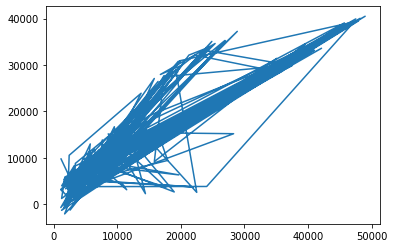

In [137]:
plt.plot(y_test,y_pred)

In [138]:
y[337]

13937.6665

In [139]:
x[337]

array([62.  , 27.55,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ])

In [140]:
model.predict([[62.  , 27.55,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ]])

array([13453.63547666])